# Sentiment Analysis

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#spacy imports
!pip install spacytextblob
import spacy  
from spacytextblob.spacytextblob import SpacyTextBlob
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')


     |████████████████████████████████| 6.4 MB 6.3 MB/s 
     |████████████████████████████████| 456 kB 40.1 MB/s 
     |████████████████████████████████| 621 kB 35.9 MB/s 
     |████████████████████████████████| 10.1 MB 28.1 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Polarity is a float within the range [-1.0, 1.0], subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective, and assessments is a list of polarity and subjectivity scores for the assessed tokens.

In [3]:
nlp.add_pipe('spacytextblob')

In [4]:
data_current = pd.read_csv('july_data.csv')
announcement_data = pd.read_csv('announcement_data.csv')

In [5]:
data_current.drop('Unnamed: 0',axis=1,inplace=True)
announcement_data.drop('Unnamed: 0',axis=1,inplace=True)

July Data

In [6]:
text_current = data_current.tweet

In [7]:
sentences = []

for i in text_current:
  i = i.replace('\n','')
  i = i.replace('RT','')
  sentences.append(i)



In [8]:
polarity = []
assessments = []
subjectivity = []
for t in sentences:
  doc = nlp(t)
  polarity.append(doc._.polarity)
  assessments.append(doc._.assessments)
  subjectivity.append(doc._.subjectivity)


In [9]:
sentiment_analysis = pd.DataFrame({'tweet_text':sentences,'polarity':polarity,'subjectivity':subjectivity,'assessments':assessments})

Average Polarity for Tweets in this period

In [10]:
sentiment_analysis.polarity.mean()

0.029852234539734523

Data from April and May 

In [11]:
text_past = announcement_data.tweet
sentences_2 = []

for i in text_past:
  i = i.replace('\n','')
  i = i.replace('RT','')
  sentences_2.append(i)

polarity2 = []
assessments2 = []
subjectivity2 = []
for t in sentences_2:
  doc = nlp(t)
  polarity2.append(doc._.polarity)
  assessments2.append(doc._.assessments)
  subjectivity2.append(doc._.subjectivity)

past_sent_analysis = pd.DataFrame({'tweet_text':sentences_2,'polarity':polarity2,'subjectivity':subjectivity2,'assessments':assessments2})

Average Polarity for Tweets in this Period

In [12]:
past_sent_analysis.polarity.mean()

0.10515551872895612

### Graphing Polarity and Subjectivity


In [13]:
sentiment_analysis['sub_binary'] = sentiment_analysis.subjectivity.apply(lambda x: 1 if x >=0.5 else 0 )

In [14]:
past_sent_analysis['sub_binary'] = past_sent_analysis.subjectivity.apply(lambda x: 1 if x >=0.5 else 0 )

#### April and May Data

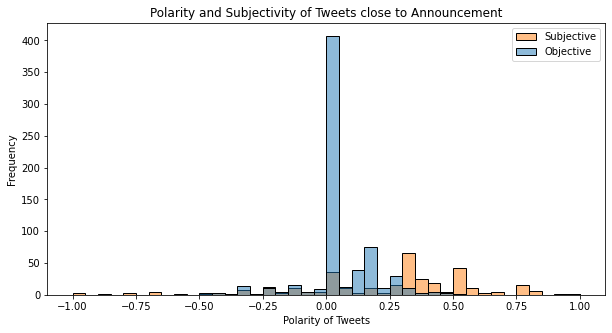

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data=past_sent_analysis,x='polarity',alpha=0.5,hue='sub_binary')
sns.color_palette("tab10")
plt.xlabel('Polarity of Tweets')
plt.ylabel('Frequency')
plt.legend(['Subjective','Objective'])
plt.title('Polarity and Subjectivity of Tweets close to Announcement')
plt.show()

#### July Data

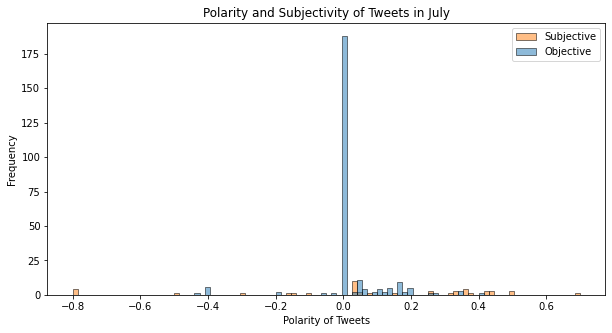

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data=sentiment_analysis,x='polarity',alpha=0.5,hue='sub_binary')
sns.color_palette("tab10")
plt.xlabel('Polarity of Tweets')
plt.ylabel('Frequency')
plt.legend(['Subjective','Objective'])
plt.title('Polarity and Subjectivity of Tweets in July')
plt.show()

## Topics and Entities Discussed in the different time periods

### April and May Data

In [15]:
negative_sent_announce = past_sent_analysis.loc[past_sent_analysis.polarity < 0]
neutral_sent_announce = past_sent_analysis.loc[past_sent_analysis.polarity == 0]
positive_sent_announce = past_sent_analysis.loc[past_sent_analysis.polarity > 0]

In [41]:
positive_sent_announce.loc[positive_sent_announce.polarity == positive_sent_announce.polarity.max()].tweet_text[855]

'Derby v Sheff Wed is a perfect example of why a hermetically sealed #EuropeanSuperLeague would never work. Here we… https://t.co/vNfiHEGhGj'

In [30]:
sw = stopwords.words('english')
sw.append('rt')
sw.append('http')

In [54]:
def calculate_word_frequency(dataset):
  text_2 = dataset.tweet_text
  sentences_2 = []

  for i in text_2:
    sentences_2.append(i)

  split_words_2 = []

  for sentence in sentences_2:
    words = sentence.split()
    for word in words:
      split_words_2.append(word.lower())

  #removing punctuation
  split_words_np_2 = [re.sub('r*[^A-Za-z0-9]+','',x) for x in split_words_2]
  for word in split_words_np_2:
    if word.startswith('http') or word.startswith('rt') or word.startswith(''):
      split_words_np_2.remove(word)

  #stemming words to their root

  english_stemmer = SnowballStemmer(language='english')

  stemmed_words_2 = []
  for word in split_words_np_2:
    stemmed_words_2.append(english_stemmer.stem(word))

  #removing stop words
  clean_words_2 = []

  for i in stemmed_words_2:
    if i not in sw:
      clean_words_2.append(i)

  clean_words_df_2 = pd.DataFrame(clean_words_2, columns=['words'])
  word_frequency_2 = clean_words_df_2.words.value_counts()

  return word_frequency_2

def display_frequencies(word_freq):
  #Graphing word frequency of the top 50 words
  plt.figure(figsize=(10,10))
  sns.barplot(x = word_freq.values[:50],y = word_freq.index[:50],alpha=.8)
  plt.title('Word Frequency in Tweets')
  plt.ylabel('Word from tweet')
  plt.xlabel('Frequency in tweets')
  plt.show()


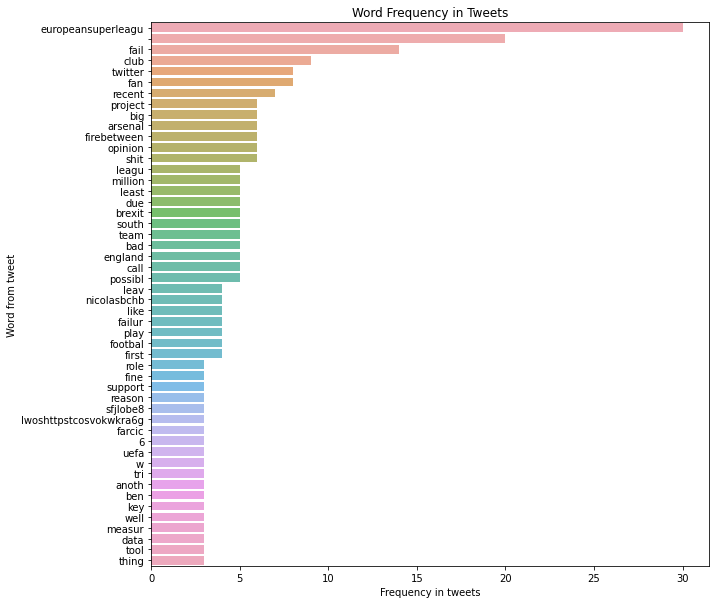

In [55]:
negative_sent_wc = calculate_word_frequency(negative_sent_announce)
display_frequencies(negative_sent_wc)

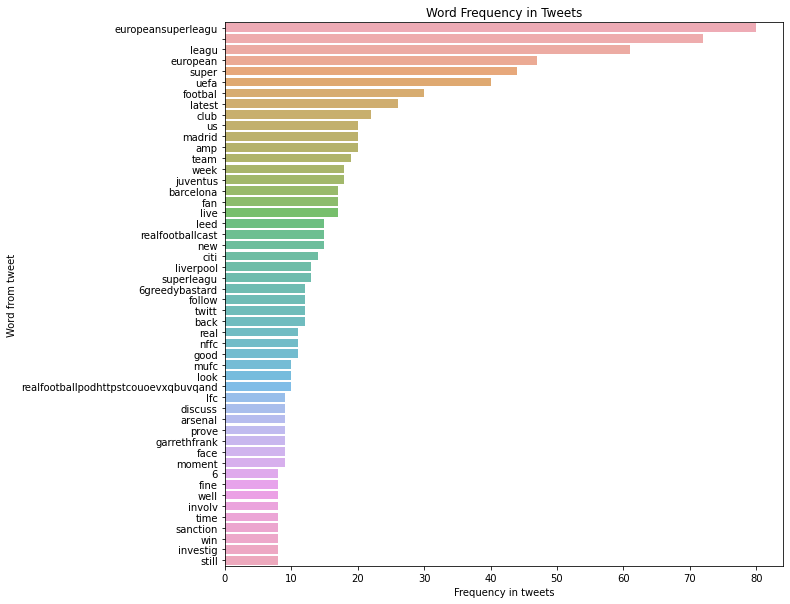

In [56]:
positive_sent_wc = calculate_word_frequency(positive_sent_announce)
display_frequencies(positive_sent_wc)

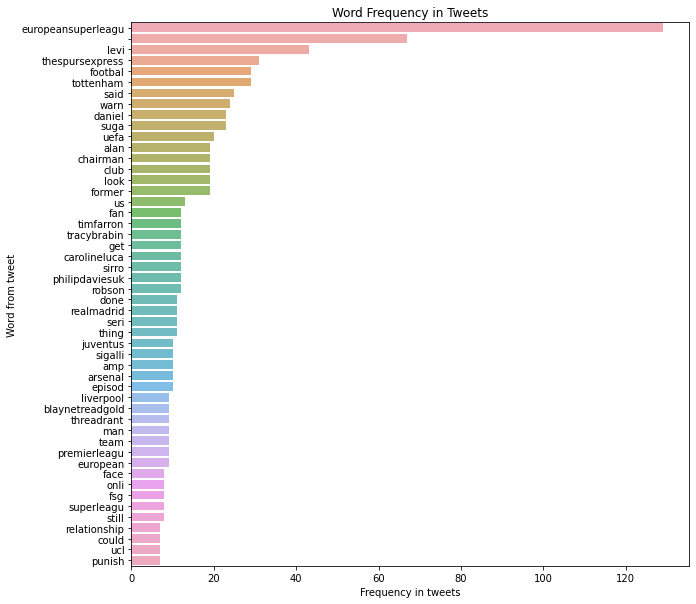

In [57]:
neutral_sent_wc =calculate_word_frequency(neutral_sent_announce)
display_frequencies(neutral_sent_wc)

### July Data

In [50]:
negative_sent_july = sentiment_analysis.loc[past_sent_analysis.polarity < 0]
neutral_sent_july = sentiment_analysis.loc[past_sent_analysis.polarity == 0]
positive_sent_july = sentiment_analysis.loc[past_sent_analysis.polarity > 0]

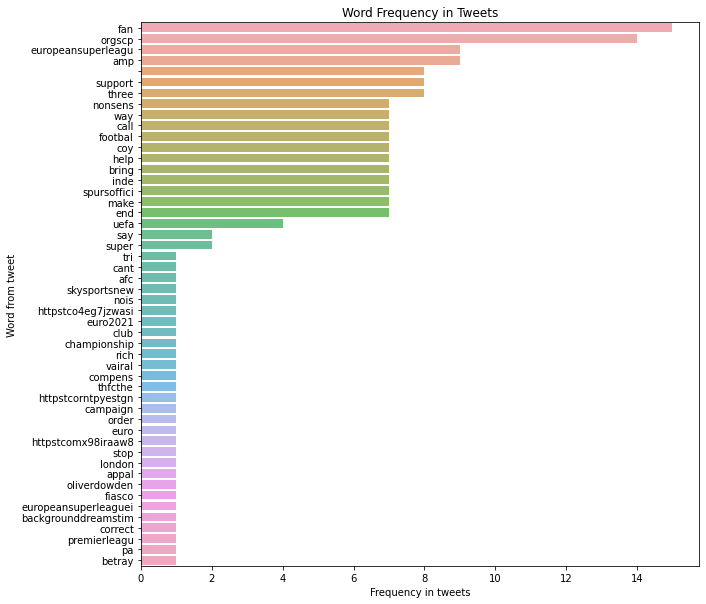

In [58]:
negative_july_wc = calculate_word_frequency(negative_sent_july)
display_frequencies(negative_july_wc)

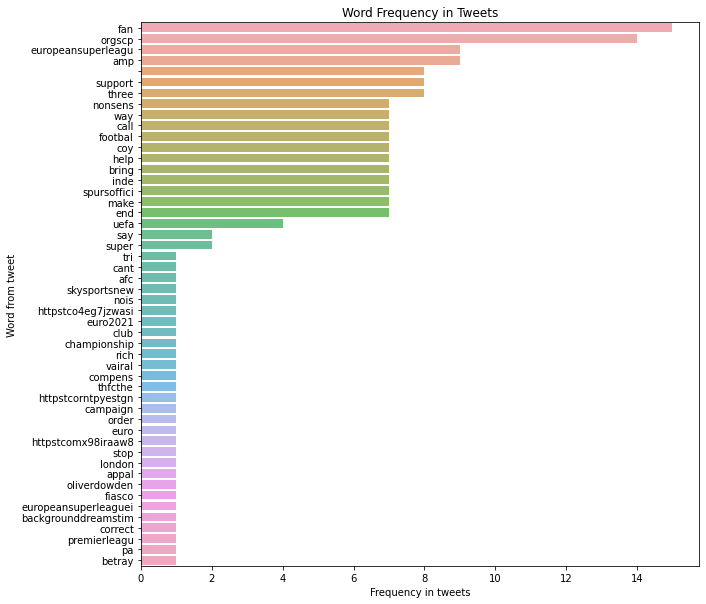

In [59]:
neutral_july_wc = calculate_word_frequency(negative_sent_july)
display_frequencies(neutral_july_wc)

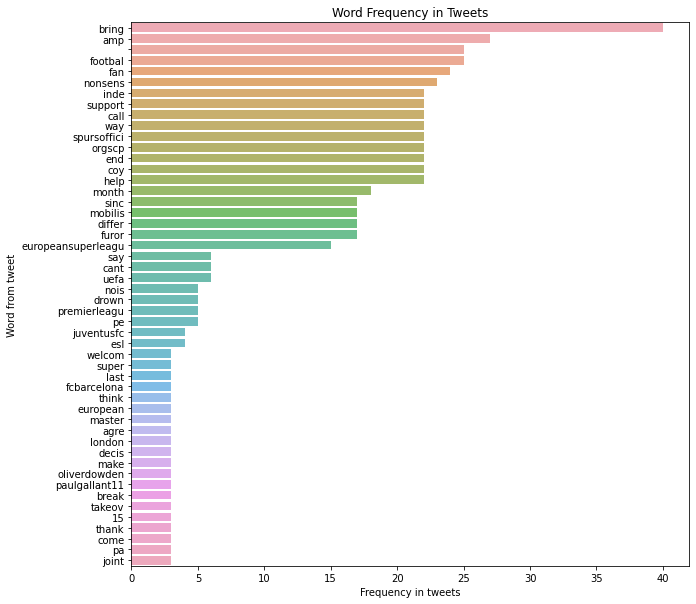

In [60]:
positive_july_wc = calculate_word_frequency(positive_sent_july)
display_frequencies(positive_july_wc)